# Visualization

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import dot,sum

In [3]:
def featureNormalize(X):
      mean_array=X.mean(0)
      std_array=X.std(0, ddof=1)
      mean_for_area=mean_array[0]
      mean_for_rooms=mean_array[1]
      std_area=std_array[0]
      std_rooms=std_array[1]
      X[:,0]=(X[:,0]-mean_for_area)/std_area
      X[:,1]=(X[:,1]-mean_for_rooms)/std_rooms
 
      return (X,mean_array,std_array)

In [4]:
def addOnes(X):
      n=X.shape[0]
      ones=np.ones(n).reshape(n,1)
      return np.concatenate((ones,X),1)


In [5]:
def computeCost(X,y,theta):
      m=len(y)
      t1=(dot(X,theta)-y).transpose()
      t2=dot(X,theta)-y
      J=dot(t1,t2)/(2*m)
      return J
def computeThetaTerm(X,y,alpha,theta):
     m=len(y)
     #3 * 47 and 47 *1 = 3* 1
     theta-= (alpha/m) * dot(X.transpose(),(dot(X,theta)-y));

def gradientDescentMulti(X,y,theta,alpha,num_iters):
      m=len(y)
      J_history=np.zeros((num_iters,1))
      for iter in range(num_iters):
            #Pass by reference
            computeThetaTerm(X,y,alpha,theta)
            cost=computeCost(X,y,theta)
            J_history[iter]=cost
      return (theta,J_history)

In [6]:
data=pd.read_csv('ex1data2.txt',header=None,names = ["area", "bedrooms","price"])
matrix=pd.DataFrame.as_matrix(data)
X=np.array([data['area'],data['bedrooms']], dtype=np.float64)
X=np.transpose(X)
(X,mean_array,std_array)=featureNormalize(X)
X=addOnes(X)
theta=np.zeros((3,1), dtype=np.float64)
y=np.array(data['price'])
m=len(y)
y=y.reshape(m,1)
h=dot(X,theta)
x=h-y
alpha=0.01
num_iters=1500
gradientDescentMulti(X,y,theta,alpha,num_iters)
print(theta)
#computeThetaTerm(X,y,alpha,theta)
#computeCost(X,y,theta)

[[ 340412.56301439]
 [ 110540.56654627]
 [  -6558.99054811]]


In [7]:
X=np.array([data['area'],data['bedrooms']], dtype=np.float64)
X=np.transpose(X)
X=addOnes(X)
X=X.reshape(m,3)
theta=theta.reshape(3,1)
from sklearn import linear_model  
model = linear_model.LinearRegression()  
model.fit(X, y) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

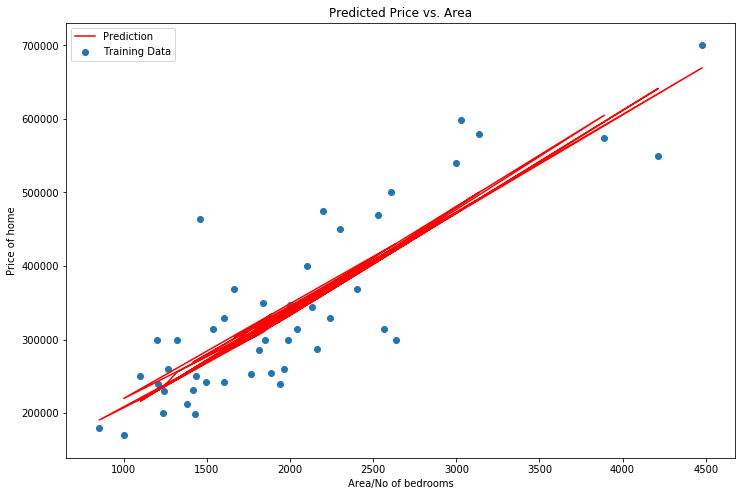

In [8]:
x = np.array(X[:, 1])  
f = model.predict(X).flatten()
X=np.array([data['area'],data['bedrooms']], dtype=np.float64)
X=np.transpose(X)
X=addOnes(X)
f1=X.dot(theta)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
#ax.plot(x, f1, 'g', label='Prediction gd') 
ax.scatter(data.area, data.price, label='Training Data')  
ax.legend(loc=2)  
ax.set_xlabel('Area/No of bedrooms')  
ax.set_ylabel('Price of home')  
ax.set_title('Predicted Price vs. Area')  

In [9]:
data.describe()

,area,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [10]:
(theta1,J_History)=gradientDescentMulti(X,y,theta,alpha,num_iters)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


In [11]:
predict= np.dot(X , theta1)

Viewing the Results

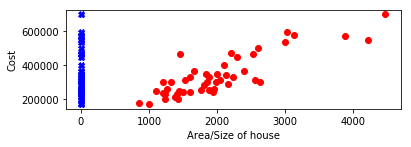

In [12]:
plt.figure(1)
plt.subplot(211)
plt.plot(X[:,1],y,'ro',X[:,2],y,'bX')
plt.xlabel("Area/Size of house")
plt.ylabel("Cost")

Cost function reduces as iterations proceed

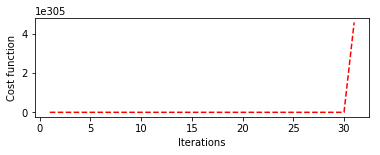

In [14]:
plt.subplot(212)
plt.plot(np.arange(num_iters)+1, J_History, 'r--')
plt.xlabel("Iterations")
plt.ylabel("Cost function")
#plt.axis([1, m, 0, 60000000000])

[[  7.34595726e+10   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   7.32959519e+10   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   7.31325199e+10 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   5.84664308e+10
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    5.83211031e+10   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   5.81759639e+10]]


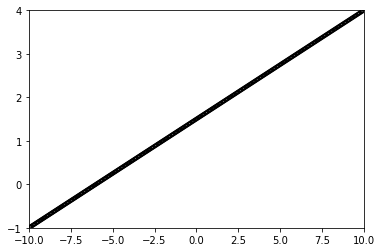

In [154]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100);
J_vals = np.zeros((theta0_vals.size, theta1_vals.size));
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        theta1=np.array([1,theta0_vals[i],theta1_vals[j]]).reshape(3,1)
        J_vals[i][i]=computeCost(X,y,theta1)
print(J_vals)        
X1, Y1 = np.meshgrid(theta0_vals, theta1_vals) 
plt.contour(X1, Y1, J_vals,colors='black')


In [5]:
t1=X[:,0].reshape(m,1)
t2=X[:,1].reshape(m,1)
t3=X[:,2].reshape(m,1)
theta[0] -= (alpha /m) * np.sum(x)
theta[1] -= (alpha /m) * np.sum(x*t2)
theta[2] -= (alpha /m) * np.sum(x*t3)

In [6]:
theta

array([[ 3404.12659574],
       [ 1046.32933766],
       [  541.23683844]])

In [10]:
t1=X[:,0].reshape(m,1)
t2=X[:,1].reshape(m,1)
t3=X[:,2].reshape(m,1)
h=dot(X,theta)
x=h-y

In [11]:
 theta[1] -= (alpha /m) * np.sum(x*t2)

In [12]:
theta[1]

array([ 1046.32933766])

In [41]:
(alpha /m) * np.sum(x*t2)

-1046.3293376618246

In [13]:
(alpha /m) * np.sum(x*t3)

-541.23683844075845

In [37]:
np.sum(x*t2)

-4917747.8870105762

In [14]:
x = h-y

In [24]:
x[0] * X[0,1]

array([-51990.94664291])

In [25]:
x[1] * X[1,1]

array([ 166332.22762983])

In [15]:
np.sum(h-y)

-15999395.0

In [29]:
(X[:,1]).shape

(47,)

In [16]:
x=(h-y)

In [17]:
theta[0] -= (alpha /m) * np.sum(x)

In [18]:
theta[0]

array([ 3404.12659574])

In [19]:
theta[1] -= (alpha /m) * (np.sum(x * X[:,1]))

In [20]:
theta

array([[  3.40412660e+03],
       [  3.76492105e-12],
       [  0.00000000e+00]])

In [35]:
a

array([[-399900.],
       [-329900.],
       [-369000.],
       [-232000.],
       [-539900.],
       [-299900.],
       [-314900.],
       [-198999.],
       [-212000.],
       [-242500.],
       [-239999.],
       [-347000.],
       [-329999.],
       [-699900.],
       [-259900.],
       [-449900.],
       [-299900.],
       [-199900.],
       [-499998.],
       [-599000.],
       [-252900.],
       [-255000.],
       [-242900.],
       [-259900.],
       [-573900.],
       [-249900.],
       [-464500.],
       [-469000.],
       [-475000.],
       [-299900.],
       [-349900.],
       [-169900.],
       [-314900.],
       [-579900.],
       [-285900.],
       [-249900.],
       [-229900.],
       [-345000.],
       [-549000.],
       [-287000.],
       [-368500.],
       [-329900.],
       [-314000.],
       [-299000.],
       [-179900.],
       [-299900.],
       [-239500.]])

In [32]:
theta[1]

array([  1.51092226e-12])

In [33]:
X[:,1]

array([  1.31415422e-01,  -5.09640698e-01,   5.07908699e-01,
        -7.43677059e-01,   1.27107075e+00,  -1.99450507e-02,
        -5.93588523e-01,  -7.29685755e-01,  -7.89466782e-01,
        -6.44465993e-01,  -7.71822042e-02,  -8.65999486e-04,
        -1.40779041e-01,   3.15099326e+00,  -9.31923697e-01,
         3.80715024e-01,  -8.65782986e-01,  -9.72625673e-01,
         7.73743478e-01,   1.31050078e+00,  -2.97227261e-01,
        -1.43322915e-01,  -5.04552951e-01,  -4.91995958e-02,
         2.40309445e+00,  -1.14560907e+00,  -6.90255715e-01,
         6.68172729e-01,   2.53521350e-01,   8.09357707e-01,
        -2.05647815e-01,  -1.27280274e+00,   5.00114703e-02,
         1.44532608e+00,  -2.41262044e-01,  -7.16966387e-01,
        -9.68809863e-01,   1.67029651e-01,   2.81647389e+00,
         2.05187753e-01,  -4.28236746e-01,   3.01854946e-01,
         7.20322135e-01,  -1.01841540e+00,  -1.46104938e+00,
        -1.89112638e-01,  -1.01459959e+00])

In [26]:
t1=(dot(X,theta)-y).transpose()

In [28]:
t2=dot(X,theta)-y

In [33]:
dot(t1,t2)/(2*m)

array([[  6.55915481e+10]])